In [2]:
from apify_client import ApifyClient
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
def scrap_asos(query, maxItems = 3):
    """ Data scraper from asos.
    Inputs: 
        query (str): search query
        maxItems (int): number of items to scrap
    
    Returns:
        Items (list): list of dictionaries containing the following keys:
            name (str): name of the item
            brandName (str): brand name of the item
            price (str): price of the item
            image (np.array): image of the item
            url (str): url of the item
            gender (str): gender of the item
    """
    
    client = ApifyClient("apify_api_zHwEmmY3hZNab6L57n4NiebpEJDQy42PNRGq")
    
    run_input = {
        "search": query,
        "maxItems": maxItems,
        "endPage": 1,
        "extendOutputFunction": "($) => { return {} }",
        "customMapFunction": "(object) => { return {...object} }",
        "proxy": { "useApifyProxy": True },
    }
    
    run = client.actor("epctex/asos-scraper").call(run_input=run_input)
    
    Items = []
    for item in client.dataset(run["defaultDatasetId"]).iterate_items():
        try :
            # Certains articles n'ont pas de prix d'où la gestion d'erreur
            price = item["variants"][0]["pricing"]["price"]["current"]["text"]
            
            Items.append({
                "name" : item["name"],
                "brandName" : item["brandName"],
                "price" : price,
                "image" : io.imread(item["images"][0]["url"]),
                "gender" : item["gender"],
                "url" : item["url"]
            })
        except:
            pass
        
    return Items

In [32]:
Items = scrap_asos("brown baggy pants")
print(Items)

KeyError: 'pricing'

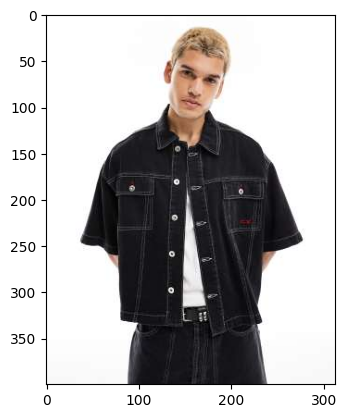

In [29]:
plt.imshow(Items[2]["image"])


In [5]:
{'productCode': '135624138', 'name': 'The North Face Essential oversized logo hoodie in black', 'gender': 'Women', 'id': 206576501, 'isNoSize': False, 'isOneSize': False, 'isDiscontinued': False, 'pdpLayout': 'Core', 'hasVariantsWithProp65Risk': True, 'productType': {'id': 8391, 'name': 'Hoodies'}, 'brandName': 'The North Face', 'brandId': 3312, 'variants': [{'variantId': 206576511, 'size': 'XS - UK 4-6', 'hasIngredients': False, 'sizeId': 453949, 'colour': 'BLACK', 'colourWayId': 206576509, 'isPrimary': True, 'sizeOrder': 1, 'ean': '197065061463', 'sku': '135624483', 'pricing': {'id': 206576511, 'isInStock': True, 'isLowInStock': False, 'isRestockingSoon': False, 'stockLastUpdatedDate': '2024-10-10T22:22:02.422Z', 'warehouse': None, 'source': None, 'seller': None, 'price': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}}, {'variantId': 206576514, 'size': 'S - UK 8-10', 'hasIngredients': False, 'sizeId': 453952, 'colour': 'BLACK', 'colourWayId': 206576509, 'isPrimary': True, 'sizeOrder': 2, 'ean': '197065061401', 'sku': '135624484', 'pricing': {'id': 206576514, 'isInStock': True, 'isLowInStock': False, 'isRestockingSoon': False, 'stockLastUpdatedDate': '2024-09-20T13:37:31.412Z', 'warehouse': None, 'source': None, 'seller': None, 'price': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}}, {'variantId': 206576512, 'size': 'M - UK 12-14', 'hasIngredients': False, 'sizeId': 453950, 'colour': 'BLACK', 'colourWayId': 206576509, 'isPrimary': True, 'sizeOrder': 3, 'ean': '197065061272', 'sku': '135624485', 'pricing': {'id': 206576512, 'isInStock': True, 'isLowInStock': False, 'isRestockingSoon': False, 'stockLastUpdatedDate': '2024-10-10T14:36:50.88Z', 'warehouse': None, 'source': None, 'seller': None, 'price': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}}, {'variantId': 206576513, 'size': 'L - UK 16-18', 'hasIngredients': False, 'sizeId': 453953, 'colour': 'BLACK', 'colourWayId': 206576509, 'isPrimary': True, 'sizeOrder': 4, 'ean': '197065061241', 'sku': '135624486', 'pricing': {'id': 206576513, 'isInStock': True, 'isLowInStock': False, 'isRestockingSoon': False, 'stockLastUpdatedDate': '2024-10-11T03:10:31.552Z', 'warehouse': None, 'source': None, 'seller': None, 'price': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}}, {'variantId': 206576510, 'size': 'XL - UK 20-22', 'hasIngredients': False, 'sizeId': 453948, 'colour': 'BLACK', 'colourWayId': 206576509, 'isPrimary': True, 'sizeOrder': 5, 'ean': '197065061432', 'sku': '135624487', 'pricing': {'id': 206576510, 'isInStock': True, 'isLowInStock': False, 'isRestockingSoon': False, 'stockLastUpdatedDate': '2024-10-28T05:57:38.181Z', 'warehouse': None, 'source': None, 'seller': None, 'price': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}}], 'images': [{'isPrimary': True, 'colour': 'BLACK', 'colourWayId': 206576509, 'imageType': 'Standard1', 'url': 'https://images.asos-media.com/products/the-north-face-essential-oversized-logo-hoodie-in-black/206576501-1-black', 'productId': 206576501, 'alternateText': 'Thumbnail 1 of 4', 'isVisible': True}, {'isPrimary': False, 'colour': '', 'colourWayId': None, 'imageType': 'Standard2', 'url': 'https://images.asos-media.com/products/the-north-face-essential-oversized-logo-hoodie-in-black/206576501-2', 'productId': 206576501, 'alternateText': 'Thumbnail 2 of 4', 'isVisible': True}, {'isPrimary': False, 'colour': '', 'colourWayId': None, 'imageType': 'Standard3', 'url': 'https://images.asos-media.com/products/the-north-face-essential-oversized-logo-hoodie-in-black/206576501-3', 'productId': 206576501, 'alternateText': 'Thumbnail 3 of 4', 'isVisible': True}, {'isPrimary': False, 'colour': '', 'colourWayId': None, 'imageType': 'Standard4', 'url': 'https://images.asos-media.com/products/the-north-face-essential-oversized-logo-hoodie-in-black/206576501-4', 'productId': 206576501, 'alternateText': 'Thumbnail 4 of 4', 'isVisible': True}], 'totalNumberOfColours': 1, 'media': {'catwalkUrl': ''}, 'sizeGuideVisible': True, 'sizeGuide': 'https://www.asos.com/web/pages/size-guides/index.html?sizeSchema=UK&data=https://www.asos.com/api/sizing/sizeapi/v1/SizeGuide/3016%3flanguage%3den-GB', 'shippingRestrictions': {'shippingRestrictionsLabel': 'This product has shipping restrictions.', 'shippingRestrictionsVisible': True, 'shippingRestrictionsIncludedCountries': ['AD', 'AE', 'AG', 'AI', 'AL', 'AO', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BL', 'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BW', 'BZ', 'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DZ', 'EC', 'EE', 'EG', 'EH', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FK', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GF', 'GH', 'GI', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GT', 'GU', 'GW', 'GY', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KH', 'KI', 'KN', 'KR', 'KW', 'KY', 'LA', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'MA', 'MC', 'MD', 'ME', 'MF', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MY', 'MZ', 'NA', 'NC', 'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NU', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PM', 'PN', 'PR', 'PT', 'PW', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SC', 'SE', 'SG', 'SH', 'SI', 'SK', 'SL', 'SN', 'SR', 'ST', 'SV', 'SX', 'SZ', 'TC', 'TD', 'TG', 'TH', 'TK', 'TN', 'TO', 'TT', 'TV', 'TW', 'TZ', 'UG', 'US', 'UY', 'VC', 'VG', 'VI', 'VN', 'VU', 'WF', 'WS', 'YT', 'ZA', 'ZM', 'ZW']}, 'plpIds': [{'id': 11321, 'type': 'SEO'}, {'id': 13489, 'type': 'Standard'}, {'id': 13493, 'type': 'Standard'}, {'id': 15347, 'type': 'Standard'}, {'id': 17426, 'type': 'Standard'}, {'id': 20061, 'type': 'Standard'}, {'id': 20246, 'type': 'Standard'}, {'id': 20249, 'type': 'Standard'}, {'id': 21272, 'type': 'Brand'}, {'id': 26091, 'type': 'Standard'}, {'id': 27953, 'type': 'Standard'}, {'id': 28608, 'type': 'Standard'}, {'id': 50005, 'type': 'Standard'}, {'id': 50046, 'type': 'Standard'}, {'id': 50047, 'type': 'Standard'}, {'id': 50053, 'type': 'Standard'}, {'id': 50086, 'type': 'Standard'}, {'id': 51115, 'type': 'Standard'}, {'id': 51118, 'type': 'Standard'}, {'id': 51302, 'type': 'Standard'}, {'id': 51307, 'type': 'Standard'}, {'id': 51314, 'type': 'Standard'}, {'id': 51339, 'type': 'Standard'}, {'id': 51343, 'type': 'Standard'}, {'id': 51821, 'type': 'Standard'}, {'id': 52076, 'type': 'Standard'}, {'id': 52175, 'type': 'Standard'}], 'looks': {'heroLookUrl': 'https://api.asos.com/product/catalogue/v4/productlooks?lookIds=207129398&store=COM'}, 'showUpSell': True, 'showCmaTitle': False, 'sellingFast': False, 'paymentPromotions': {'clearpay': {'gb': {'gbp': {'minimumTransactionAmount': 25, 'maximumTransactionAmount': 800}}}, 'payPalPayIn3': {'gb': {'gbp': {'minimumTransactionAmount': 30, 'maximumTransactionAmount': 2000}}}, 'klarnaPI3': {'gb': {'gbp': {'minimumTransactionAmount': 25, 'maximumTransactionAmount': 800}}}}, 'hasPaymentPromotionAvailable': True, 'saveCount': {'canShowSaveCount': True, 'value': 1048, 'lastChanged': '11/23/2024 13:00:00', 'duration': 720}, 'hasVariantsWithIngredients': False, 'url': 'https://www.asos.com/the-north-face/the-north-face-essential-oversized-logo-hoodie-in-black/prd/206576501#colourWayId-206576509', 'pricing': {'current': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'previous': {'value': 94.99, 'text': '€94.99', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'rrp': {'value': None, 'text': None, 'versionId': 'REGP0000020010000000000000000', 'conversionId': '0'}, 'xrp': {'value': 68.71, 'text': '£68.71', 'versionId': 'REGP0000020010000000000000000', 'conversionId': '5720'}, 'currency': 'EUR', 'isMarkedDown': False, 'isOutletPrice': False, 'startDateTime': '2024-11-11T02:01:59Z', 'previousEndDate': None, 'lowestPriceInLast30DaysValue': None, 'lowestPriceInLast30DaysText': None, 'lowestPriceInLast30DaysEndDate': None, 'lowestPriceInLast30DaysPercentage': None, 'discountPercentage': 0}}


{'productCode': '135624138',
 'name': 'The North Face Essential oversized logo hoodie in black',
 'gender': 'Women',
 'id': 206576501,
 'isNoSize': False,
 'isOneSize': False,
 'isDiscontinued': False,
 'pdpLayout': 'Core',
 'hasVariantsWithProp65Risk': True,
 'productType': {'id': 8391, 'name': 'Hoodies'},
 'brandName': 'The North Face',
 'brandId': 3312,
 'variants': [{'variantId': 206576511,
   'size': 'XS - UK 4-6',
   'hasIngredients': False,
   'sizeId': 453949,
   'colour': 'BLACK',
   'colourWayId': 206576509,
   'isPrimary': True,
   'sizeOrder': 1,
   'ean': '197065061463',
   'sku': '135624483',
   'pricing': {'id': 206576511,
    'isInStock': True,
    'isLowInStock': False,
    'isRestockingSoon': False,
    'stockLastUpdatedDate': '2024-10-10T22:22:02.422Z',
    'warehouse': None,
    'source': None,
    'seller': None,
    'price': {'current': {'value': 94.99,
      'text': '€94.99',
      'versionId': 'REGP0000020010000000000000000',
      'conversionId': '0'},
     'pr